Topic:        Challenge Set 5
Subject:      Linear Splitting
Date:         01/30/2018
Name:         Matias Beeck


In [2]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
df = pd.read_csv('2013_movies.csv', parse_dates=['ReleaseDate'], 
                 date_parser=lambda dt: pd.datetime.strptime(dt, '%Y-%m-%d %H:%M:%S'))
df.columns = df.columns.str.lower()

In [7]:
df

,title,budget,domestictotalgross,director,rating,runtime,releasedate
0,The Hunger Games: Catching Fire,130000000.00,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.00,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.00,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.00,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.00,291045518,Zack Snyder,PG-13,143,2013-06-14
5,Gravity,100000000.00,274092705,Alfonso Cuaron,PG-13,91,2013-10-04
6,Monsters University,nan,268492764,Dan Scanlon,G,107,2013-06-21
7,The Hobbit: The Desolation of Smaug,nan,258366855,Peter Jackson,PG-13,161,2013-12-13
8,Fast & Furious 6,160000000.00,238679850,Justin Lin,PG-13,130,2013-05-24
9,Oz The Great and Powerful,215000000.00,234911825,Sam Raimi,PG,127,2013-03-08


## Challenge 1

In [8]:
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import OLS

df = add_constant(df)
df.head()

,const,title,budget,domestictotalgross,director,rating,runtime,releasedate
0,1.00,The Hunger Games: Catching Fire,130000000.00,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,1.00,Iron Man 3,200000000.00,409013994,Shane Black,PG-13,129,2013-05-03
2,1.00,Frozen,150000000.00,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,1.00,Despicable Me 2,76000000.00,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,1.00,Man of Steel,225000000.00,291045518,Zack Snyder,PG-13,143,2013-06-14


In [9]:
model = OLS(df['domestictotalgross'], df['const']).fit()


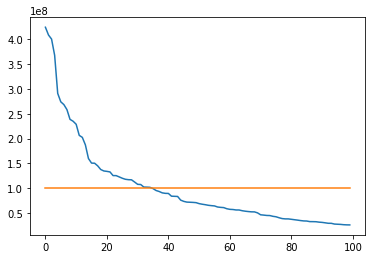

In [10]:
pred = model.predict(df['const'])
plt.plot(df['domestictotalgross'])
plt.plot(pred)

(array([ 23.,  10.,  14.,   9.,   6.,   6.,   6.,   4.,   5.,   2.,   1.,
          0.,   1.,   2.,   0.,   2.,   1.,   1.,   2.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   2.,   1.]),
 array([ -7.50286242e+07,  -6.17252977e+07,  -4.84219712e+07,
         -3.51186446e+07,  -2.18153181e+07,  -8.51199155e+06,
          4.79133498e+06,   1.80946615e+07,   3.13979880e+07,
          4.47013146e+07,   5.80046411e+07,   7.13079676e+07,
          8.46112942e+07,   9.79146207e+07,   1.11217947e+08,
          1.24521274e+08,   1.37824600e+08,   1.51127927e+08,
          1.64431253e+08,   1.77734580e+08,   1.91037906e+08,
          2.04341233e+08,   2.17644560e+08,   2.30947886e+08,
          2.44251213e+08,   2.57554539e+08,   2.70857866e+08,
          2.84161192e+08,   2.97464519e+08,   3.10767845e+08,
          3.24071172e+08]),
 <a list of 30 Patch objects>)

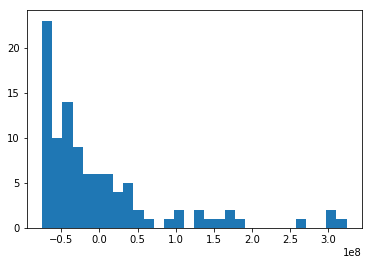

In [11]:
plt.hist(model.resid, bins=30)


This model predicts the constant of 1 and the residuals are skewed right.

## Challenge 2

In [12]:
df.dropna(axis=0, how='any', inplace=True)

In [13]:
x = df[['const', 'budget']]
model = OLS(df['domestictotalgross'], x).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           1.19e-07
Time:                        15:34:01   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.443e+07    1.3e+07      3.418      0.001    1.86e+07    7.03e+07
budget         0.7831      0.135      5.782      0.000       0.514       1.052
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The intercept & first coefficient are significant at the 1% level.
The budget coefficient of 0.7831 implies that there is a \$0.78 return for each added dollar spent.
The R^2 = 0.286 thus the model's predicted power is not great

(array([  4.,   7.,  28.,  26.,  11.,   6.,   1.,   0.,   1.,   3.]),
 array([ -1.43102776e+08,  -1.00948471e+08,  -5.87941663e+07,
         -1.66398616e+07,   2.55144431e+07,   6.76687478e+07,
          1.09823052e+08,   1.51977357e+08,   1.94131662e+08,
          2.36285967e+08,   2.78440271e+08]),
 <a list of 10 Patch objects>)

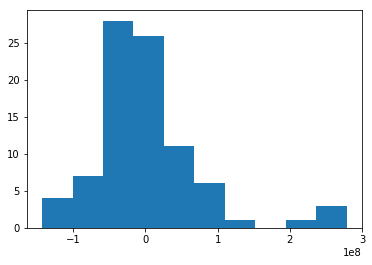

In [15]:
plt.hist(model.resid)

Text(0.5,0,'budget')

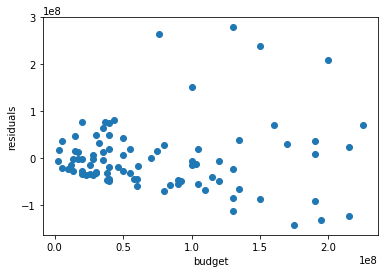

In [16]:
plt.scatter(x['budget'], model.resid)
plt.ylabel('residuals')
plt.xlabel('budget')


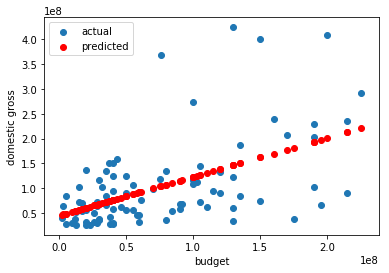

In [18]:
# plot model prediction against your feature variable
plt.scatter(x['budget'], df['domestictotalgross'], label='actual')
plt.scatter(x['budget'], model.predict(x), c='r', label='predicted')
plt.xlabel('budget')
plt.ylabel('domestic gross')
plt.legend();

As budget get larger, residuals get larger. With only one feature variable, the predictions are going to be completely dependent on the one coefficient (slope) of the feature variable (budget in this case). That means the predictions will be a straight line as shown above.

## Challenge 3

Categorizing ratings

In [19]:
df.rating.unique()

array(['PG-13', 'PG', 'R'], dtype=object)

In [20]:
# Creating dummies for industry categories
rating_dummies = pd.get_dummies(df['rating'])
rating_dummies.rename(columns = lambda x: "rat_" + x.replace(" ", "_").lower(), inplace = True)
df = df.join(rating_dummies)
df.head()

,const,title,budget,domestictotalgross,director,rating,runtime,releasedate,rat_pg,rat_pg-13,rat_r
0,1.00,The Hunger Games: Catching Fire,130000000.00,424668047,Francis Lawrence,PG-13,146,2013-11-22,0,1,0
1,1.00,Iron Man 3,200000000.00,409013994,Shane Black,PG-13,129,2013-05-03,0,1,0
2,1.00,Frozen,150000000.00,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,1,0,0
3,1.00,Despicable Me 2,76000000.00,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,1,0,0
4,1.00,Man of Steel,225000000.00,291045518,Zack Snyder,PG-13,143,2013-06-14,0,1,0


In [21]:
x = df[['const','budget','rat_pg','rat_pg-13']]
model = OLS(df['domestictotalgross'], x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     11.13
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           3.25e-06
Time:                        15:40:20   Log-Likelihood:                -1699.7
No. Observations:                  87   AIC:                             3407.
Df Residuals:                      83   BIC:                             3417.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.389e+07   1.45e+07      3.029      0.003    1.51e+07    7.27e+07
budget         0.7806      0.156      5.005      0.000       0.470       1.091
rat_pg      1.384e+07   2.57e+07      0.539      0.591   -3.72e+07    6.49e+07
rat_pg-13  -3.268e+06   2.01e+07     -0.163      0.871   -4.32e+07    3.67e+07
==============================================================================
Omnibus:                       36.518   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.882
Skew:                           1.529   Prob(JB):                     1.66e-18
Kurtosis:                       6.638   Cond. No.                     3.47e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model does not improve much, if at all, when we add the categorical variable for rating. Both rating categories aren't significant either.

Text(0.5,0,'budget')

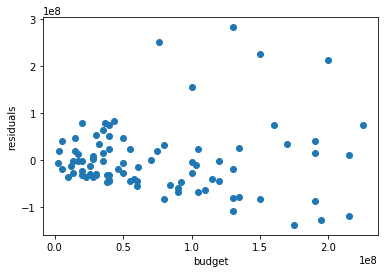

In [23]:
plt.scatter(x['budget'], model.resid)
plt.ylabel('residuals')
plt.xlabel('budget')


The residuals look very similar to the last fit in challenge 2

Text(0,0.5,'Domestic Total Gross')

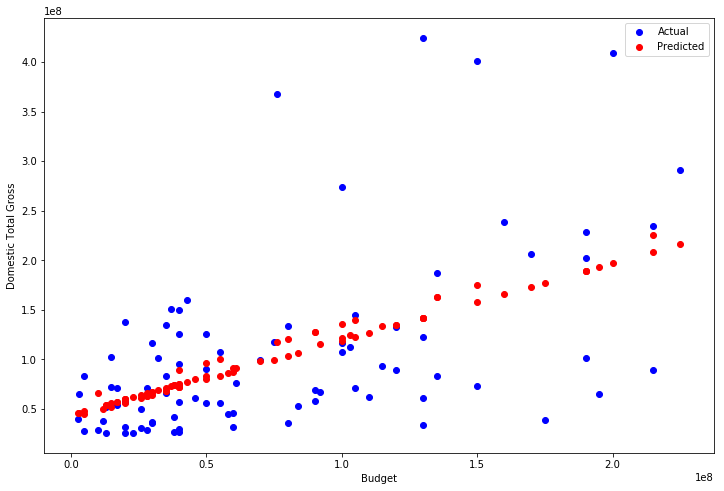

In [24]:
pred = model.predict(x)

plt.figure(figsize=(12,8))
plt.scatter(x['budget'], df['domestictotalgross'], label='Actual', c='b')
plt.scatter(x['budget'], model.predict(x), label='Predicted', c='r')
plt.legend();
plt.xlabel('Budget')
plt.ylabel('Domestic Total Gross')


Here we see different lines forming for when something is of a different rating as those categories just became 1's or 0's. The adjusted R-sq actually decreased when adding categorical features.

## Challenge 4

In [26]:
# log_transform 'Budget' and 'DomesticTotalGross'
df['log_budget'] = df['budget'].apply(np.log)
df['log_domestictotalgross'] = df['domestictotalgross'].apply(np.log)

(array([ 13.,   8.,  10.,  15.,  12.,  13.,   4.,   6.,   2.,   4.]),
 array([ 17.05686194,  17.33785759,  17.61885323,  17.89984887,
         18.18084451,  18.46184015,  18.74283579,  19.02383143,
         19.30482707,  19.58582271,  19.86681836]),
 <a list of 10 Patch objects>)

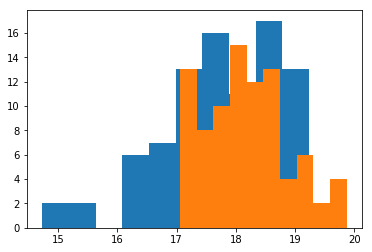

In [32]:
plt.hist(df['log_budget'])
plt.hist(df['log_domestictotalgross'])

In [34]:
df.head()

,const,title,budget,domestictotalgross,director,rating,runtime,releasedate,rat_pg,rat_pg-13,rat_r,log_budget,log_domestictotalgross
0,1.00,The Hunger Games: Catching Fire,130000000.00,424668047,Francis Lawrence,PG-13,146,2013-11-22,0,1,0,18.68,19.87
1,1.00,Iron Man 3,200000000.00,409013994,Shane Black,PG-13,129,2013-05-03,0,1,0,19.11,19.83
2,1.00,Frozen,150000000.00,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,1,0,0,18.83,19.81
3,1.00,Despicable Me 2,76000000.00,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,1,0,0,18.15,19.72
4,1.00,Man of Steel,225000000.00,291045518,Zack Snyder,PG-13,143,2013-06-14,0,1,0,19.23,19.49


In [42]:
x = df[['const', 'log_budget', 'runtime', 'rat_pg', 'rat_pg-13']]
model = OLS(df['log_domestictotalgross'], x).fit()

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_domestictotalgross   R-squared:                       0.277
Model:                                OLS   Adj. R-squared:                  0.242
Method:                     Least Squares   F-statistic:                     7.867
Date:                    Thu, 01 Feb 2018   Prob (F-statistic):           2.04e-05
Time:                            15:55:40   Log-Likelihood:                -79.718
No. Observations:                      87   AIC:                             169.4
Df Residuals:                          82   BIC:                             181.8
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0063      1.329      9.036      0.000       9.363      14.650
log_budget     0.3055      0.086      3.545      0.001       0.134       0.477
runtime        0.0063      0.004      1.408      0.163      -0.003       0.015
rat_pg         0.1744      0.233      0.749      0.456      -0.289       0.637
rat_pg-13      0.0303      0.163      0.186      0.853      -0.295       0.355
==============================================================================
Omnibus:                        4.150   Durbin-Watson:                   0.706
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                2.406
Skew:                           0.170   Prob(JB):                        0.300
Kurtosis:                       2.260   Cond. No.                     2.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Domestic Total Gross')

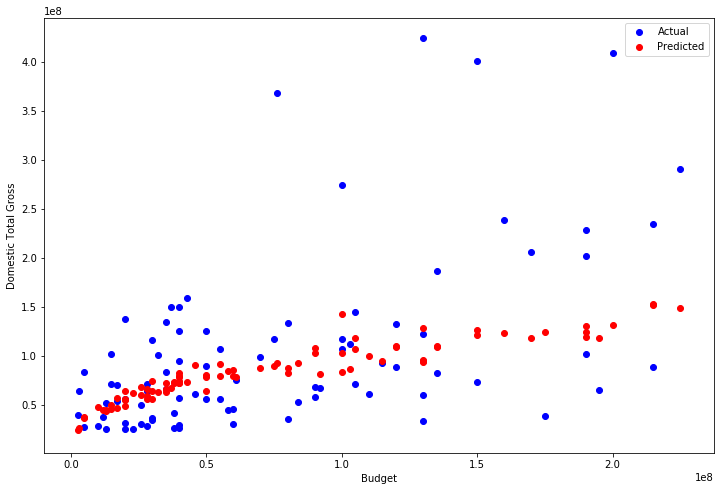

In [45]:
pred = model.predict(x)

plt.figure(figsize=(12,8))
plt.scatter(x['log_budget'].apply(np.exp), df['log_domestictotalgross'].apply(np.exp), label='Actual', c='b')
plt.scatter(x['log_budget'].apply(np.exp), model.predict(x).apply(np.exp), label='Predicted', c='r')
plt.legend();
plt.xlabel('Budget')
plt.ylabel('Domestic Total Gross')

Seems our model is overfitting as the R-sq is decreasing when we transform our features.

## Challenge 5

In [64]:
from sklearn.cross_validation import train_test_split
y = pd.DataFrame(df['log_domestictotalgross'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model = OLS(y_train, X_train)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_domestictotalgross   R-squared:                       0.216
Model:                                OLS   Adj. R-squared:                  0.164
Method:                     Least Squares   F-statistic:                     4.127
Date:                    Thu, 01 Feb 2018   Prob (F-statistic):            0.00509
Time:                            16:02:12   Log-Likelihood:                -58.341
No. Observations:                      65   AIC:                             126.7
Df Residuals:                          60   BIC:                             137.6
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0230      1.574      8.274      0.000       9.875      16.171
log_budget     0.2545      0.103      2.462      0.017       0.048       0.461
runtime        0.0058      0.005      1.127      0.264      -0.004       0.016
rat_pg         0.1474      0.271      0.544      0.588      -0.395       0.689
rat_pg-13     -0.0052      0.187     -0.028      0.978      -0.379       0.368
==============================================================================
Omnibus:                        1.371   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                1.297
Skew:                           0.217   Prob(JB):                        0.523
Kurtosis:                       2.461   Cond. No.                     2.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Domestic Total Gross')

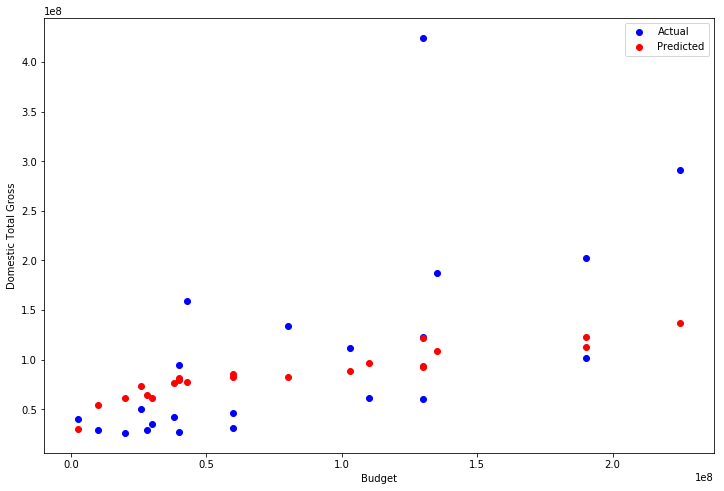

In [67]:
y_pred = model.predict(X_test)

plt.figure(figsize=(12,8))
plt.scatter(X_test['log_budget'].apply(np.exp), y_test['log_domestictotalgross'].apply(np.exp), label='Actual', c='b')
plt.scatter(X_test['log_budget'].apply(np.exp), y_pred.apply(np.exp), label='Predicted', c='r')
plt.legend();
plt.xlabel('Budget')
plt.ylabel('Domestic Total Gross')